In [2]:
from datetime import datetime
import pandas as pd
import logging
from collections import Counter
import numpy as np
from pycaret.classification import ClassificationExperiment

- The dataset is from the [American Express - Default Prediction](https://www.kaggle.com/competitions/amex-default-prediction/overview)  kaggle competition. 
- Goal of the competition is predict credit default based on the customer's monthly profile.
- For each customer, 189 features are provided in the dataset

In [3]:
train_data = pd.read_feather("../data/train_data.ftr")

In [4]:
train_data.shape

(5531451, 191)

In [5]:
train_data.head()

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938477,0.001734,0.008728,1.006836,0.009224,0.124023,0.008774,0.004707,...,NaN,NaN,0.002426,0.003706,0.003819,NaN,0.000569,0.000610,0.002674,0
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936523,0.005775,0.004925,1.000977,0.006153,0.126709,0.000798,0.002714,...,NaN,NaN,0.003956,0.003166,0.005032,NaN,0.009575,0.005493,0.009216,0
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954102,0.091492,0.021652,1.009766,0.006817,0.123962,0.007599,0.009422,...,NaN,NaN,0.003269,0.007328,0.000427,NaN,0.003429,0.006985,0.002604,0
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.960449,0.002455,0.013687,1.002930,0.001372,0.117188,0.000685,0.005531,...,NaN,NaN,0.006119,0.004517,0.003201,NaN,0.008423,0.006527,0.009598,0
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.947266,0.002483,0.015190,1.000977,0.007607,0.117310,0.004654,0.009308,...,NaN,NaN,0.003672,0.004944,0.008888,NaN,0.001670,0.008125,0.009827,0


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5531451 entries, 0 to 5531450
Columns: 191 entries, customer_ID to target
dtypes: category(11), datetime64[ns](1), float16(177), int64(1), object(1)
memory usage: 2.0+ GB


In [7]:
# list of column names and their data types
train_data

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938477,0.001734,0.008728,1.006836,0.009224,0.124023,0.008774,0.004707,...,NaN,NaN,0.002426,0.003706,0.003819,NaN,0.000569,0.000610,0.002674,0
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936523,0.005775,0.004925,1.000977,0.006153,0.126709,0.000798,0.002714,...,NaN,NaN,0.003956,0.003166,0.005032,NaN,0.009575,0.005493,0.009216,0
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954102,0.091492,0.021652,1.009766,0.006817,0.123962,0.007599,0.009422,...,NaN,NaN,0.003269,0.007328,0.000427,NaN,0.003429,0.006985,0.002604,0
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.960449,0.002455,0.013687,1.002930,0.001372,0.117188,0.000685,0.005531,...,NaN,NaN,0.006119,0.004517,0.003201,NaN,0.008423,0.006527,0.009598,0
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.947266,0.002483,0.015190,1.000977,0.007607,0.117310,0.004654,0.009308,...,NaN,NaN,0.003672,0.004944,0.008888,NaN,0.001670,0.008125,0.009827,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5531446,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,2017-11-05,0.979492,0.416016,0.020813,0.828125,0.003487,0.090759,0.005341,0.025146,...,NaN,NaN,0.006836,0.003679,0.000457,NaN,0.000906,0.001497,0.002775,0
5531447,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,2017-12-23,0.984863,0.296631,0.007210,0.812500,0.005905,0.079895,0.002243,0.023697,...,NaN,NaN,0.003309,0.007095,0.007858,NaN,0.002777,0.008224,0.008858,0
5531448,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,2018-01-06,0.982910,0.444092,0.013153,0.815430,0.003456,0.100525,0.002111,0.012344,...,NaN,NaN,0.009956,0.009995,0.001088,NaN,0.005692,0.006775,0.005566,0
5531449,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,2018-02-06,0.969727,0.442627,0.009857,1.003906,0.005116,0.101807,0.009933,0.008575,...,NaN,NaN,0.005543,0.006565,0.009880,NaN,0.008125,0.001168,0.003983,0


In [8]:
# Ensure date column is in datetime format
train_data["S_2"] = pd.to_datetime(train_data["S_2"])

# Sort values by date
train_data = train_data.sort_values("S_2")

The features for each customer are divided into the following 5 categories:
  1. D_* = Delinquency variables
  2. S_* = Spend variables
  3. P_* = Payment variables
  4. B_* = Balance variables
  5. R_* = Risk variables

In [9]:
count_of_feature_type = Counter(
    [x.split("_")[0] for x in train_data.columns if x not in ["customer_ID", "target"]]
)
count_of_feature_type = pd.DataFrame(count_of_feature_type, index=["count"]).T
count_of_feature_type

,count
S,22
P,3
D,96
B,40
R,28


### Imbalance Data

0    0.750903
1    0.249097
Name: target, dtype: float64


<AxesSubplot: title={'center': 'Target Distribution'}>

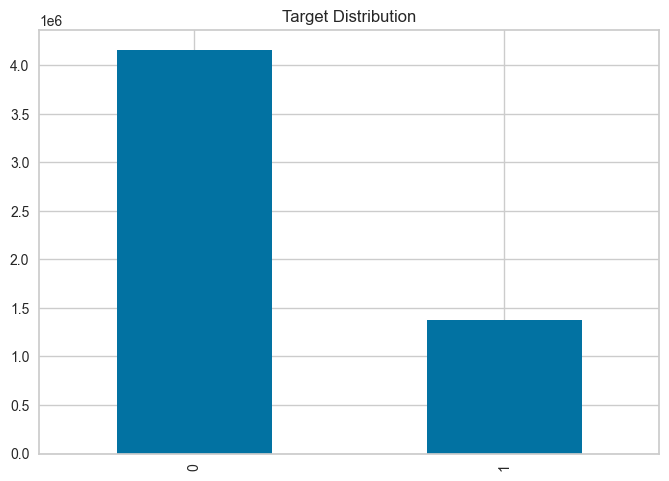

In [10]:
# calculate the percentage of training data that is 1 and 0
print(train_data["target"].value_counts(normalize=True))
train_data["target"].value_counts().plot(kind="bar", title="Target Distribution")

In [11]:
train_data = train_data.sort_values(by=["customer_ID", "S_2"])

In [12]:
# pick random sample of customer_IDs from train_data
np.random.seed(42)
customer_ID_rand = np.random.choice(train_data["customer_ID"], 10000, replace=False)

In [13]:
train_rndm_sample = train_data[train_data["customer_ID"].isin(customer_ID_rand)]

In [14]:
# customer_IDs that are not in the random sample for the training data
customer_ID_not_train = list(
    set(train_data["customer_ID"]).difference(set(customer_ID_rand))
)

# pick random sample of customer_IDs from customer_ID_not_train
customer_ID_test_rnd = np.random.choice(customer_ID_not_train, 10000, replace=False)

# test data based on the random sample of customer_IDs
test_rndm_sample = train_data[
    train_data["customer_ID"].isin(customer_ID_test_rnd)
].sort_values(by=["customer_ID", "S_2"])

In [15]:
test_rndm_sample.shape

(120346, 191)

In [16]:
# drop customer_ID and S_2 from train and test data
train_rndm_sample.drop(["customer_ID", "S_2"], axis=1, inplace=True)
test_rndm_sample.drop(["customer_ID", "S_2"], axis=1, inplace=True)

0    0.767212
1    0.232788
Name: target, dtype: float64


<AxesSubplot: title={'center': 'Target Distribution'}>

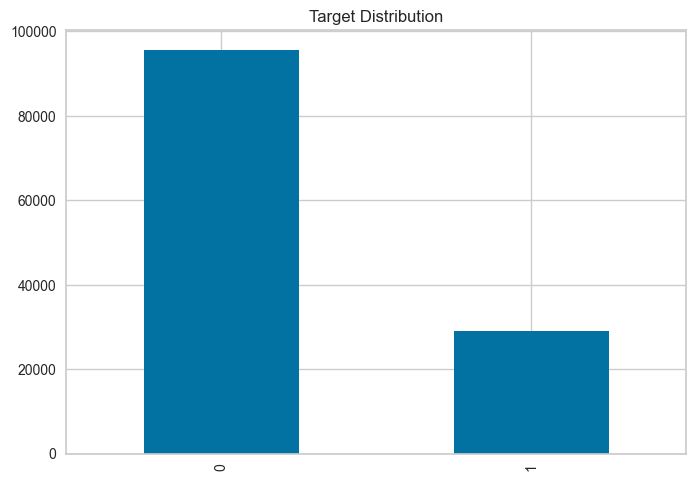

In [17]:
# calculate the percentage of training data sample that is 1 and 0
print(train_rndm_sample["target"].value_counts(normalize=True))
train_rndm_sample["target"].value_counts().plot(kind="bar", title="Target Distribution")

In [18]:
s = ClassificationExperiment()
s.setup(
    data=train_rndm_sample,
    target="target",
    normalize=True,
    session_id=123,
    fix_imbalance=True,
    fold=5,
)

,Description,Value
0,Session id,123
1,Target,target
2,Target type,Binary
3,Original data shape,"(124538, 189)"
4,Transformed data shape,"(171126, 220)"
5,Transformed train set shape,"(133764, 220)"
6,Transformed test set shape,"(37362, 220)"
7,Ordinal features,4
8,Numeric features,177
9,Categorical features,11


In [18]:
s.models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [77]:
number_of_models = len(s.models())
compare_models_all = s.compare_models(n_select=number_of_models)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9591,0.9913,0.9333,0.8955,0.9140,0.8872,0.8875,3.1220
knn,K Neighbors Classifier,0.9507,0.9876,0.9677,0.8437,0.9015,0.8688,0.8725,9.9920
catboost,CatBoost Classifier,0.9356,0.9785,0.8591,0.8636,0.8613,0.8194,0.8194,11.9960
xgboost,Extreme Gradient Boosting,0.9190,0.9701,0.8328,0.8215,0.8271,0.7742,0.7742,27.2460
rf,Random Forest Classifier,0.9111,0.9662,0.8971,0.7627,0.8245,0.7654,0.7699,12.7880
lightgbm,Light Gradient Boosting Machine,0.8966,0.9562,0.8120,0.7602,0.7852,0.7173,0.7179,2.2520
gbc,Gradient Boosting Classifier,0.8612,0.9317,0.8374,0.6588,0.7375,0.6449,0.6535,70.4020
lr,Logistic Regression,0.8539,0.9355,0.8823,0.6337,0.7376,0.6401,0.6569,3.4140
dt,Decision Tree Classifier,0.8534,0.8091,0.7261,0.6712,0.6976,0.6010,0.6019,8.9740
ada,Ada Boost Classifier,0.8492,0.9192,0.8125,0.6383,0.7149,0.6144,0.6227,13.0040


Processing:   0%|          | 0/84 [00:00<?, ?it/s]

In [ ]:
pred_scores_df = pd.DataFrame()
for x in compare_models_all:
    df_pred = s.predict_model(
        x,
        data=test_rndm_sample,
    )
    x = s.pull()
    pred_scores_df = pd.concat([pred_scores_df, x])

In [82]:
display(pred_scores_df.sort_values(by=["Accuracy"], ascending=False))

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.8736,0.9325,0.7398,0.7363,0.7381,0.6548,0.6548
0,Light Gradient Boosting Machine,0.8729,0.9322,0.7713,0.7205,0.7451,0.6606,0.6613
0,Random Forest Classifier,0.8656,0.9277,0.8062,0.6886,0.7428,0.6526,0.6563
0,Extra Trees Classifier,0.8655,0.9265,0.7677,0.7017,0.7332,0.6436,0.6447
0,Extreme Gradient Boosting,0.8653,0.9246,0.7274,0.7170,0.7222,0.6332,0.6333
0,Gradient Boosting Classifier,0.8593,0.9283,0.8518,0.6612,0.7445,0.6496,0.6595
0,Logistic Regression,0.8514,0.9310,0.8778,0.6394,0.7398,0.6394,0.6551
0,Ada Boost Classifier,0.8487,0.9178,0.8151,0.6476,0.7218,0.6198,0.6275
0,Linear Discriminant Analysis,0.8462,0.9310,0.8949,0.6263,0.7369,0.6330,0.6531
0,Ridge Classifier,0.8462,0.8628,0.8948,0.6263,0.7369,0.6329,0.6530


In [ ]:
for model in compare_models_all:
    s.save_model(model, "../models_saved/" + model.__class__.__name__)

In [19]:
# Load saved models
catboost = s.load_model("../models_saved/CatBoostClassifier")
catboost

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/var/folders/st/9fkv5y5s4dqd7g46g06m83br0000gn/T/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['P_2', 'D_39', 'B_1', 'B_2', 'R_1',
                                             'S_3', 'D_41', 'B_3', 'D_42',
                                             'D_43', 'D_44', 'B_4', 'D_45',
                                             'B_5', 'R_2', 'D_46', 'D_47',
                                             'D_48', 'D_49', 'B_6', 'B_7',
                                             'B_8', 'D_50', 'D_51', 'B_9',
                                             'R_3', 'D_52', 'P_3', 'B_10',...
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=FixImbalancer(estimator=SMOTE(k_neighbors=5,
                                                                              n_jobs=None,
                                                                              random_state=None,
                                                                              sampling_strategy='auto')))),
                ('normalize',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=StandardScaler(copy=True,
                                                               with_mean=True,
                                                               with_std=True))),
                ('trained_model',
                 <catboost.core.CatBoostClassifier object at 0x37221ef20>)],
         verbose=False)

In [20]:
s.predict_model(catboost, data=test_rndm_sample)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.8721,0.9339,0.7512,0.7450,0.7481,0.6624,0.6624


,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,...,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target,prediction_label,prediction_score
854,NaN,0.000401,0.038452,0.817871,0.008720,0.221313,0.009689,0.008148,0.004711,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.6605
855,NaN,0.006691,0.113586,0.810547,0.008865,0.223877,0.008926,0.005302,0.008713,NaN,...,1.002930,0.000124,0.922852,0.381592,1.005859,0.096619,0.545410,0,0,0.8160
856,0.884277,0.009117,0.045654,0.419922,0.008865,0.256348,0.007641,0.044312,0.005653,NaN,...,1.008789,0.008186,0.926270,0.377930,1.007812,0.098083,0.554688,0,0,0.9512
857,0.882324,0.033936,0.021149,1.004883,0.002228,0.155518,0.000536,0.010483,0.011032,NaN,...,1.002930,0.003345,0.928223,0.385010,1.006836,0.095276,0.546387,0,0,0.9821
858,0.837891,0.537109,0.048370,1.001953,0.006199,0.163330,0.008705,0.012329,0.011482,NaN,...,1.004883,0.003662,0.928223,0.385986,1.007812,0.093933,0.549805,0,0,0.9839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5531064,0.203735,0.002665,0.021835,1.007812,0.505371,0.745605,0.005512,0.005951,NaN,0.797363,...,1.004883,0.008736,0.872559,0.091980,1.008789,0.000610,0.186035,1,1,0.9014
5531065,0.141846,0.009293,0.026993,1.004883,1.008789,0.774414,0.001700,0.007866,NaN,0.704590,...,1.008789,0.008926,0.873047,0.094849,1.001953,0.003864,0.184204,1,1,0.9273
5531066,0.181519,0.916504,0.040039,1.008789,1.507812,0.640137,0.009369,0.002464,NaN,0.642578,...,1.003906,0.007259,0.876465,0.100647,1.007812,0.007374,0.184448,1,1,0.9618
5531067,0.078674,2.066406,0.044281,0.000965,0.759766,0.692871,0.547363,0.035919,NaN,0.590820,...,1.004883,0.003983,0.874512,0.108643,1.003906,0.004486,0.187988,1,1,0.9942


In [21]:
tuned_cat_boost, catboost_tuner = s.tune_model(
    catboost,
    custom_grid={"learning_rate": [0.01, 0.03], "depth": [4, 6, 8, 10]},
    return_tuner=True,
)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9536,0.9879,0.8975,0.9026,0.9001,0.8698,0.8699
1,0.9542,0.9868,0.8987,0.9038,0.9013,0.8714,0.8714
2,0.9519,0.9870,0.9002,0.8938,0.8970,0.8656,0.8656
3,0.9528,0.9872,0.9093,0.8903,0.8997,0.8688,0.8689
4,0.9550,0.9884,0.8978,0.9080,0.9029,0.8736,0.8736
Mean,0.9535,0.9874,0.9007,0.8997,0.9002,0.8699,0.8699
Std,0.0011,0.0006,0.0044,0.0066,0.0019,0.0027,0.0027


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 8 candidates, totalling 40 fits


In [22]:
pd.DataFrame(catboost_tuner.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_trained_model__learning_rate,param_trained_model__depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,110.850201,14.209613,0.476505,0.068119,0.01,4,"{'trained_model__learning_rate': 0.01, 'traine...",0.865967,0.868139,0.863550,0.869458,0.868540,0.867131,0.002126,8
1,122.078396,5.323736,0.519032,0.086176,0.03,4,"{'trained_model__learning_rate': 0.03, 'traine...",0.886843,0.889475,0.884141,0.889762,0.886607,0.887366,0.002071,5
2,152.094375,13.560946,0.520278,0.109399,0.01,6,"{'trained_model__learning_rate': 0.01, 'traine...",0.875545,0.877603,0.871982,0.878348,0.876685,0.876032,0.002232,7
3,160.731383,5.046318,0.671348,0.085937,0.03,6,"{'trained_model__learning_rate': 0.03, 'traine...",0.905942,0.907600,0.900717,0.908976,0.906051,0.905857,0.002801,3
4,252.917193,32.444981,1.024894,0.181378,0.01,8,"{'trained_model__learning_rate': 0.01, 'traine...",0.885639,0.887927,0.881560,0.888615,0.883969,0.885542,0.002587,6
5,340.492067,5.190661,1.628834,0.445748,0.03,8,"{'trained_model__learning_rate': 0.03, 'traine...",0.929055,0.932779,0.924003,0.932951,0.928190,0.929396,0.003309,2
6,636.871919,6.554447,0.929736,0.200108,0.01,10,"{'trained_model__learning_rate': 0.01, 'traine...",0.897568,0.902954,0.895211,0.901405,0.899455,0.899319,0.002740,4
7,545.599821,43.311018,0.446750,0.175276,0.03,10,"{'trained_model__learning_rate': 0.03, 'traine...",0.953602,0.954173,0.951878,0.952796,0.955033,0.953496,0.001090,1


In [23]:
s.save_model(tuned_cat_boost, "../models_saved/tuned_cat_boost_07_11_2023")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/var/folders/st/9fkv5y5s4dqd7g46g06m83br0000gn/T/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['P_2', 'D_39', 'B_1', 'B_2', 'R_1',
                                              'S_3', 'D_41', 'B_3', 'D_42',
                                              'D_43', 'D_44', 'B_4', 'D_45',
                                              'B_5', 'R_2', 'D_46', 'D_47',
                                              'D_48', 'D_49', 'B_6', 'B_7',
                                              'B_8', 'D_50', 'D_51', 'B_9',
                                              'R_3', 'D_52', 'P_3', 'B_10',...
                  TransformerWrapper(exclude=None, include=None,
                                     transformer=FixImbalancer(estimator=SMOTE(k_neighbors=5,
                                                                               n_jobs=None,
                      

In [21]:
tuned_cat_boost = s.load_model("../models_saved/tuned_cat_boost_07_11_2023")

Transformation Pipeline and Model Successfully Loaded


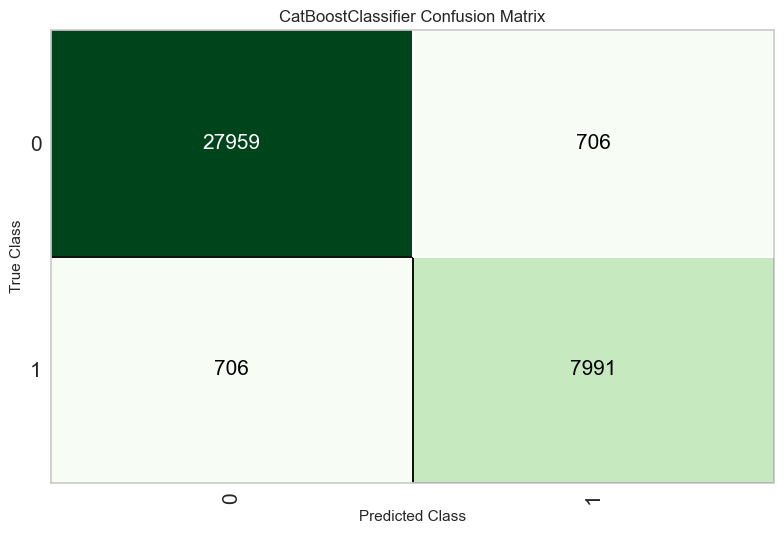

In [22]:
s.plot_model(tuned_cat_boost, plot="confusion_matrix")

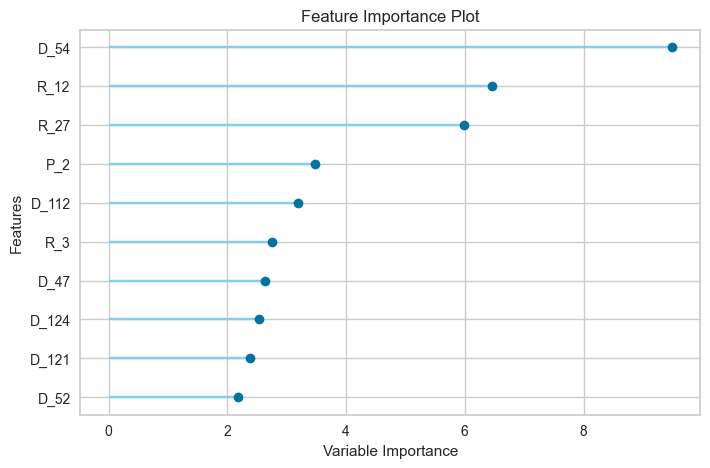

In [26]:
# check the residuals of trained model**
s.plot_model(tuned_cat_boost, plot = 'feature')

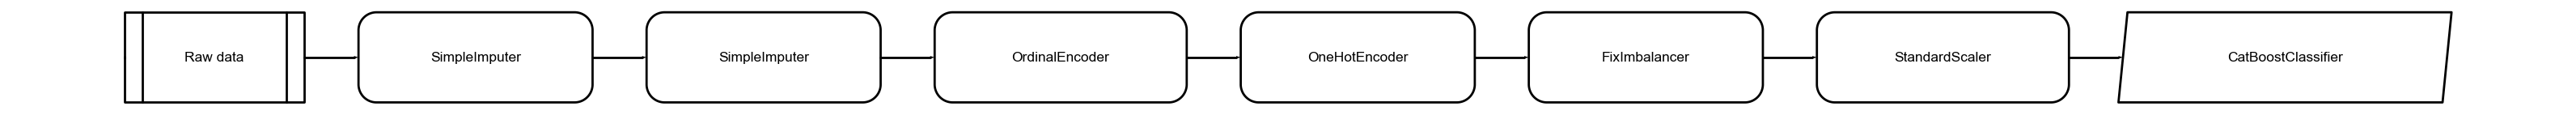

In [29]:
s.plot_model(tuned_cat_boost, plot = 'pipeline')

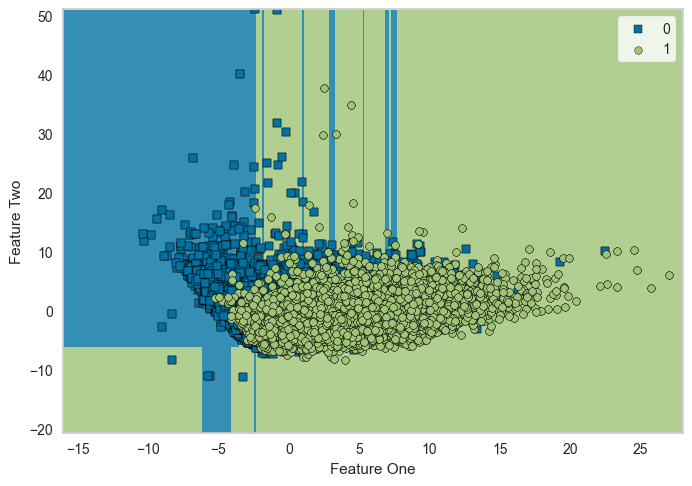

In [33]:
s.plot_model(tuned_cat_boost, plot = 'boundary')

In [35]:
s.interpret_model(tuned_cat_boost)

TypeError: This function only supports tree based models for binary classification: et, lightgbm, dt, catboost, rf, xgboost.

In [37]:
s.create_app(tuned_cat_boost, app_kwargs={"title": "CatBoost"})

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


Traceback (most recent call last):
  File "/Users/arnav9/.pyenv/versions/3.10.10/lib/python3.10/site-packages/gradio/routes.py", line 401, in run_predict
    output = await app.get_blocks().process_api(
  File "/Users/arnav9/.pyenv/versions/3.10.10/lib/python3.10/site-packages/gradio/blocks.py", line 1302, in process_api
    result = await self.call_function(
  File "/Users/arnav9/.pyenv/versions/3.10.10/lib/python3.10/site-packages/gradio/blocks.py", line 1025, in call_function
    prediction = await anyio.to_thread.run_sync(
  File "/Users/arnav9/.pyenv/versions/3.10.10/lib/python3.10/site-packages/anyio/to_thread.py", line 31, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(
  File "/Users/arnav9/.pyenv/versions/3.10.10/lib/python3.10/site-packages/anyio/_backends/_asyncio.py", line 937, in run_sync_in_worker_thread
    return await future
  File "/Users/arnav9/.pyenv/versions/3.10.10/lib/python3.10/site-packages/anyio/_backends/_asyncio.py", line 867, in run
 